In [13]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

movies = pd.read_csv('fandango_score_comparison.csv')

(array([ 0.,  1.,  2., 20., 14., 22., 27., 20., 25., 15.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

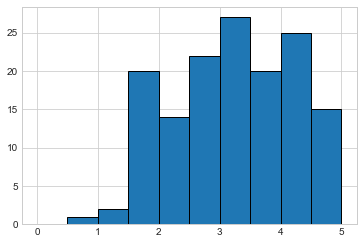

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies['Metacritic_norm_round'], bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], ec='black')

(array([ 0.,  0.,  0.,  0.,  0.,  0., 12., 27., 41., 66.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

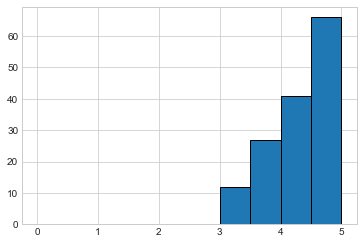

In [20]:
plt.hist(movies['Fandango_Stars'], bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], ec='black')

In [4]:
mean_fan = movies['Fandango_Stars'].mean()
mean_meta = movies['Metacritic_norm_round'].mean()

median_fan = movies['Fandango_Stars'].median()
median_meta = movies['Metacritic_norm_round'].median()

std_fan = movies['Fandango_Stars'].std()
std_meta = movies['Metacritic_norm_round'].std()

In [5]:
print(mean_fan, mean_meta)
print(median_fan, median_meta)
print(std_fan, std_meta)

4.089041095890411 2.9726027397260273
4.0 3.0
0.5403859779787334 0.9909605613743359


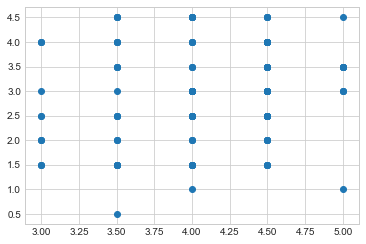

In [16]:
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])

In [7]:
import numpy as np

movies['fm_diff'] = np.abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])

In [8]:
movies = movies.sort_values('fm_diff', ascending=False)

In [9]:
movies.head()['FILM']

3       Do You Believe? (2015)
85           Little Boy (2015)
47                Annie (2014)
19               Pixels (2015)
134    The Longest Ride (2015)
Name: FILM, dtype: object

In [17]:
from scipy.stats import pearsonr
from scipy.stats import linregress

In [23]:
r, p = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
r, p

(0.17844919073895918, 0.031161516228523815)

In [22]:
slope, intercept, _, _, _ = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
slope, intercept

(0.09731107797392852, 3.799773918899418)

In [24]:
pred_3 = 3 * slope + intercept
pred_3

4.091707152821203

In [25]:
pred_1 = slope + intercept
pred_5 = 5 + slope + intercept
pred_1, pred_5

(3.8970849968733465, 8.897084996873346)

(1, 5)

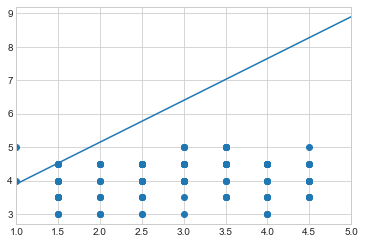

In [26]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim([1, 5])